In [1]:
#Use this dataset of airline arrival information to predict how late flights will be. 
#A flight only counts as late if it is more than 30 minutes late.

In [2]:
import pandas as pd #To hand with data 
import numpy as np #To math 
import seaborn as sns #to visualization
import matplotlib.pyplot as plt # to plot the graphs
import matplotlib.gridspec as gridspec # to do the grid of plots
import warnings
warnings.filterwarnings("ignore")

In [3]:
df_airline = pd.read_csv("Airline_Arrivals_2008.csv")

In [4]:
df_airline.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0


In [5]:
df_airline.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [6]:
#first thing we will do is create a base line model using the existing columns as features
#then create another model with features related to answers for the questions below:
#show late air craft delay based on weather delay, nas delay, carrier delay  and security delay.
#show late air craft delay based on holidays and time of week (busiest travel days)
#show late air craft delay based on distance from origin and destination

In [7]:
#We have a NaN values that we will need to clean up first.

In [8]:
#df_airline.describe
#df_airline.shape

In [13]:
#if isnull() is used it will return True = missing, False = not missing. if isnull().sum is used it will display
#a count of the total missing values for each column as it will convert True's to 1 and False to 0.
#i.e pandas creates a dataframe of trues and fales and sum counts the row values down a column.

df_airline.isnull().sum()

#to see the sum of NaN and the values of a particular column use the following line
#df_airline['NASDelay'].value_counts(dropna=False)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

In [10]:
# I am curious about the last several columns for delay. It appears to me the entire column maybe null 
# which means we will not need to use the columns in the model or need to address the NaN values.
#let;s determine the total of each column to confirm. 

In [11]:
#it looks like the delay columns do have values so we will need to address the NaN values in those columns
df_airline[df_airline.WeatherDelay.isnull()].head()
#df_airline[df_airline.CancellationCode.isnull()].tail()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [ ]:
#some methods to use when dealing with removing NaN
#drop a row if ANY of the values have a missing. Also, note the dropna has the default of inplace = false
#therefore it temporarily drops the columns but if you were to rerun the state the column would still display. 
#to permanently remove the column either assign it to variable in it's current state or use inplace = True

#however, I am not sure I want to use this method below as I don't want to lose all of the data for a row because 
#one value was NaN
df_airline.dropna(how='any')

#instead I will add another parameter that will drop all rows when all of the columns are NaN. This indicates
#that the column value for that row is empty then I can saftly say I don't need the the row/column.
df_airline.dropna(how='all')

#the below example states drop a row if the value in column1 or column2 is missing
df_airline.dropna(subset = ['column1','column2'], how='any')

In [ ]:
#investigate the unques values of column Cancelled
#df_airline['Cancelled'].value_counts(dropna=False)

#investigate the unques values of column Cancellation code
#df_airline['CRSElapsedTime'].value_counts(dropna=False)

In [12]:
#based on the data above I think it makes sense to fill the NaN values = None for the categorical variables
#I am unable to determine the best value to use for the Nan Values. Therefore, I will use the 00.0 
#to indicate the values that replaced NaN

df_airline['CancellationCode'].fillna(value='NONE', inplace=True)
df_airline['CarrierDelay'].fillna(value='00.0', inplace=True)
df_airline['WeatherDelay'].fillna(value='00.0', inplace=True)
df_airline['NASDelay'].fillna(value='00.0', inplace=True)
df_airline['SecurityDelay'].fillna(value='00.0', inplace=True)
df_airline['LateAircraftDelay'].fillna(value='00.0', inplace=True)
df_airline['ArrDelay'].fillna(value='00.0', inplace=True)
df_airline['ArrTime'].fillna(value='00.0', inplace=True)
df_airline['AirTime'].fillna(value='00.0', inplace=True)
df_airline['DepDelay'].fillna(value='00.0', inplace=True)
df_airline['TaxiIn'].fillna(value='00.0', inplace=True)
df_airline['TaxiOut'].fillna(value='00.0', inplace=True)
df_airline['ActualElapsedTime'].fillna(value='00.0', inplace=True)
df_airline['TailNum'].fillna(value='NONE', inplace=True)
df_airline['DepTime'].fillna(value='00.0', inplace=True)
df_airline['CRSElapsedTime'].fillna(value='00.0', inplace=True)

In [ ]:
#ALL DATA HAS BEEN CLEANED MOVE TO CREATING THE DATA MODEL
df_airline.head()

In [ ]:
#Categorical variables can't exist in a regression model we need to address them by transforming 
#them in discrete values

#df_airline['CancellationCode'].unique # this statement will show each value for each row

#investigate the unques values of column Cancellation code
df_airline['CancellationCode'].value_counts(dropna=False) #this statment will show the total count by group

#this column is a CATEGORICAL variable, before running it in the model I will remove it from the X dataframe
#df_airline['UniqueCarrier'].value_counts(dropna=False) #this statment will show the total count by group

#this column is a CATEGORICAL variable, before running it in the model I will remove it from the X dataframe
#df_airline['TailNum'].value_counts(dropna=False) #this statment will show the total count by group

In [ ]:
#df_airline['CancellationCode_nf' = np.where(df_airline['CancellationCode']=='A', 1, )

In [ ]:
#confirm values in the following columns
#df_airline['ActualElapsedTime'].value_counts(dropna=False) #this statment will show the total count by group
#df_airline['CRSElapsedTime'].value_counts(dropna=False) #this statment will show the total count by group
#df_airline['AirTime'].value_counts(dropna=False) #this statment will show the total count by group

In [16]:
#check the dtypes of the columns and make object columns type int64
df_airline.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [15]:
#Change the datatype of all of the columns that contain object types to float
df_airline['DepTime'] = df_airline['DepTime'].astype('float64')
df_airline['ArrTime'] = df_airline['ArrTime'].astype('float64')
df_airline['ActualElapsedTime'] = df_airline['ActualElapsedTime'].astype('float64')
df_airline['CRSElapsedTime'] = df_airline['CRSElapsedTime'].astype('float64')
df_airline['AirTime'] = df_airline['AirTime'].astype('float64')
df_airline['CarrierDelay']= df_airline['CarrierDelay'].astype('float64')
df_airline['WeatherDelay']= df_airline['WeatherDelay'].astype('float64')
df_airline['NASDelay']= df_airline['NASDelay'].astype('float64')
df_airline['SecurityDelay']= df_airline['SecurityDelay'].astype('float64')
df_airline['LateAircraftDelay']= df_airline['LateAircraftDelay'].astype('float64')
df_airline['ArrDelay']= df_airline['ArrDelay'].astype('float64')
df_airline['DepDelay']= df_airline['DepDelay'].astype('float64')
df_airline['TaxiIn']= df_airline['TaxiIn'].astype('float64')
df_airline['TaxiOut']= df_airline['TaxiOut'].astype('float64')

In [ ]:
#ask mentor why do I have to put this in double brackets
#what is the difference between using the statement below and using np.where(df_airline['LateAircraftDelay']>30, 1, 0)
#y = df_airline[['LateAircraftDelay']] > 30 
#X = df_airline.iloc[:,0:-1] #get all rows and columns except for the last column LateAircraftDelay

In [17]:
#ask mentor why do I have to put this in double brackets
#let's define our X predictor variable and Y outcome variable 
X = df_airline[['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'FlightNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay','Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled','Diverted', 'CarrierDelay','WeatherDelay', 'NASDelay', 'SecurityDelay']]
y = df_airline[['LateAircraftDelay']]

In [ ]:
#Ask mentor why this statement does create a 2 demensinal array
#y = np.where(df_airline['LateAircraftDelay']>30, df_airline['LateAircraftDelay'],00.0)

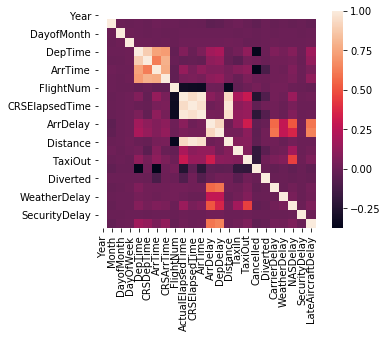

In [18]:
#Ask mentor why didn't I get all of my columns
#check to see how much correlation you have between your predictor variables.
sns.heatmap(df_airline.corr(), square=True)

In [19]:
# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced. Note that by convention, the
# intercept is not regularized. Since we standardized the data
# earlier, the intercept should be equal to zero and can be dropped.

from sklearn import linear_model
ridgeregr = linear_model.Ridge(alpha=10, fit_intercept=False) 
#y = y.reshape(1,-1)
#X = X.reshape(1,-1)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(ridgeregr, X, y, cv=5)
print('\n Percentage accuracy of X and Y is: ', cv_results)

ridgeregr.fit(X, y)

print("The R2 score is: ", ridgeregr.score(X, y))
origparams = ridgeregr.coef_[0]
print("The regression coeffients are:", origparams)

pred_y_sklearn = ridgeregr.predict(X) #use for just X

print('\n Accuracy by airline arrival time predicition')
#print(pd.crosstab(pred_y_sklearn, y))
print('Predictions of new values of X for airline arrival times:',pred_y_sklearn )


 Percentage accuracy of X and Y is:  [0.90061799 0.87902407 0.90325984 0.84582817 0.88783981]
The R2 score is:  0.8884828635025487
The regression coeffients are: [ 6.16057776e-04  7.26529908e-02 -1.28095078e-03  6.31867347e-03
 -1.83833466e-03  1.73034546e-03 -1.49698523e-03  9.78904811e-04
  6.76493399e-05  1.35227389e-01  6.11542666e-02 -1.70855049e-01
  5.27147752e-01  3.24186932e-01 -2.99178977e-03 -1.41769755e-01
 -8.94404595e-02 -1.10990060e+01 -1.60638134e+01 -8.72657070e-01
 -8.49905536e-01 -7.61967589e-01 -8.91292833e-01]

 Accuracy by airline arrival time predicition
Predictions of new values of X for airline arrival times: [[-1.90680403]
 [10.97142717]
 [12.79810309]
 ...
 [ 3.01111515]
 [12.53906304]
 [ 3.40263083]]


In [26]:
#Let's use Lasso and compare it to Ridge and determine if our accuracy score is better, equal or worse
#Using Lasso runs really slow response, not sure what is wrong
# Small number of parameters.
lass = linear_model.Lasso(alpha=.35)

X_train, Y_train = X,y

lassfit = lass.fit(X_train, Y_train)
print('R² for the model with few features:')
print(lass.score(X_train, Y_train))
origparams = np.append(lassfit.coef_, lassfit.intercept_)
print('\nParameter estimates for the model with few features:')
print(origparams)


R² for the model with few features:
0.8862790724740197

Parameter estimates for the model with few features:
[ 0.00000000e+00  4.39793591e-02 -0.00000000e+00  0.00000000e+00
 -3.66717730e-04  3.94530260e-04 -7.89693608e-04  2.81757976e-04
  5.65095473e-05  6.76839230e-02  2.17756888e-03 -4.23777563e-02
  4.73272672e-01  3.72698617e-01 -3.08984793e-03 -0.00000000e+00
  2.83846499e-02 -0.00000000e+00 -0.00000000e+00 -8.66974400e-01
 -8.40347132e-01 -7.59184548e-01 -4.11910911e-01  1.12687111e+00]


In [28]:
#Use a decision tree regression model and compare if the results from ridge regression and see which performs the best

from sklearn.tree import DecisionTreeRegressor

#increasing the max_depth is improving the accuracy. I initally started with 3 with a 60% accuracy
#increased it to 5 with a 83% accurracy
#increased it to 7 with a 94% accurracy
regressor = DecisionTreeRegressor(max_depth=7)

from sklearn.model_selection import cross_val_score
cv_results =cross_val_score(regressor, X, y, cv=5)
print('\n Percentage accuracy of X and Y cross validation results are : ', cv_results)

regressor.fit(X, y)

#score = cross_val_score(regressor, X_test, y_test)
score = regressor.score(X, y)

print("The overal R2 score is: ",score) 


 Percentage accuracy of X and Y cross validation results are :  [0.94299676 0.94127798 0.94250993 0.93995127 0.93330322]
The overal R2 score is:  0.9435712075049149


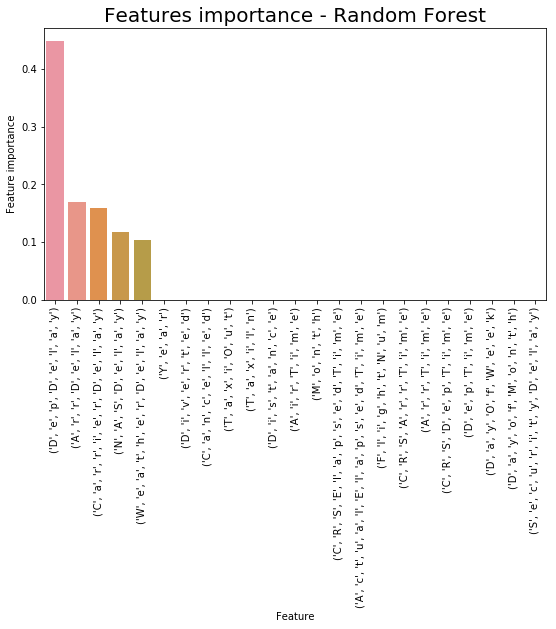

In [30]:
#Let's review the list of important features that Random forest selected.
features = X

plt.figure(figsize = (9,5))

feat_import = pd.DataFrame({'Feature': features, 'Feature importance': regressor.feature_importances_})
feat_import = feat_import.sort_values(by='Feature importance',ascending=False)

g = sns.barplot(x='Feature',y='Feature importance',data=feat_import)
g.set_xticklabels(g.get_xticklabels(),rotation=90)
g.set_title('Features importance - Random Forest',fontsize=20)
plt.show() 

In [ ]:
#Overall it looks like Ridge and Lasso provided consisten accuracy scores of about 88%. 
#The decision tree model got better as more max_depths were added amd reched a high score of 94% 
#which out performed Ridge and Lasso
